# ASTR101 Project

* have students classify a sample of galaxies in field, filaments, cluster
* morphology should include
  * smooth vs feasures of disk
  * smooth - round, elongated
  * disk 
    * edge on vs face on
    * bulge - s,m,l
    * bar
  * color
    * red, yellow, some blue
 
* compare morphologies as a function of environment

* try to make other...  not sure where I was going with this... 


# Research Question 1 - Does morphology vary with environment?

## Test sample of 25 galaxies for classification

* get images from legacy and paste into google form

* students will classify morphology
* this is set up in a google form


* VFID
* NED name
* smooth/rounded or disk
* edge-on disk
* bar?
* spiral arms?
* anything odd?
* link to legacy viewer



In [231]:
from matplotlib import pyplot as plt
import numpy as np
import os
import sys
from astropy.io import fits
from astropy.table import Table

In [232]:
homedir = os.getenv("HOME")
sys.path.append(os.path.join(homedir,'github/Virgo/programs/'))
import virgoCommon

In [233]:
outdir = homedir+'/research/Virgo/ASTR101/'

In [234]:
%run ~/github/Virgo/programs/readtables.py

/home/rfinn/github/Virgo/programs/readtables.py:120: RuntimeWarning: divide by zero encountered in log10
  g = 22.5 - 2.5*np.log10(dr9['FLUX_G'])
/home/rfinn/github/Virgo/programs/readtables.py:120: RuntimeWarning: invalid value encountered in log10
  g = 22.5 - 2.5*np.log10(dr9['FLUX_G'])
/home/rfinn/github/Virgo/programs/readtables.py:121: RuntimeWarning: divide by zero encountered in log10
  r = 22.5 - 2.5*np.log10(dr9['FLUX_R'])
/home/rfinn/github/Virgo/programs/readtables.py:121: RuntimeWarning: invalid value encountered in log10
  r = 22.5 - 2.5*np.log10(dr9['FLUX_R'])
/home/rfinn/github/Virgo/programs/readtables.py:122: RuntimeWarning: divide by zero encountered in log10
  z = 22.5 - 2.5*np.log10(dr9['FLUX_Z'])
/home/rfinn/github/Virgo/programs/readtables.py:122: RuntimeWarning: invalid value encountered in log10
  z = 22.5 - 2.5*np.log10(dr9['FLUX_Z'])
/home/rfinn/github/Virgo/programs/readtables.py:124: RuntimeWarning: invalid value encountered in log10
  const = 5*np.log10(d_

In [278]:
gzoo = Table.read('/home/rfinn/research/Virgo/ancil-tables/vf_v1_galaxyzoo2.fits')

In [279]:
gzoo_flag = ~np.isnan(gzoo['ra_2'])

In [251]:
len(gzoo_flag)

6797

# Classification of galaxies in different environemnt
## Need to generate catalogs for them to use with google sheets

* galaxy id
* ned name
* vr
* SGX, SGY, SGZ
* logMstar
* logSFR
* A100, HI mass
* filament, field, cluster
* group
* local density


### Criteria
* has logMstar, logSFR estimate
* radius flag
* dec < 32 for alfalfa?
* size > ?


In [219]:
z0mgs_flag = (v.z0mgs['logmass'] > 8.5 ) & (v.z0mgs['logmass'] < 12 )   & v.main['Z0MGSflag']
a100_flag = (v.main['DEC'] < 32)
size_flag =  v.main['radius_flag'] & (v.main['radius'] < 150) & (v.main['radius'] > 40)
weird_flag = np.abs(v.env['SGX'] < 40.) & (v.env['n5th_2D'] > -999) 

gr = v.dr9['Mg']-v.dr9['Mr']
gr_flag = (gr > 0) & (gr < 1.2) & (~np.isnan(gr))

legacy_flag = (v.main['RA'] > 122)& (v.main['RA'] < 250) & gr_flag

flag = z0mgs_flag  & size_flag & weird_flag & legacy_flag
flag_all = z0mgs_flag & size_flag & legacy_flag
print('flag ',sum(flag))
print('flag_all',sum(flag_all))
novirgo_flag = flag &(v.env['flag_clus'] < .5)
print('novirgo_flag ',sum(novirgo_flag))

Nsample=50
# filament members
filament_flag = v.fil['filament_member'] & novirgo_flag
filament_members = np.arange(len(v.main))[v.fil['filament_member'] & novirgo_flag]
filament_members_subset = np.random.choice(filament_members,replace=False,size=Nsample)

# field members
field_flag = (v.env['flag_fie']>0.5) & novirgo_flag
field_members = np.arange(len(v.main))[(v.env['flag_fie']>0.5) & novirgo_flag]
field_members_subset = np.random.choice(field_members,replace=False,size=Nsample)

# randomly select some cluster members
cluster_flag = v.env['flag_clus']>0.5
virgo_members = np.arange(len(v.main))[(v.env['flag_clus']>0.5) & flag]
#print(gr[virgo_members])
virgo_members_subset = np.random.choice(virgo_members,replace=False,size=Nsample)

/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in subtract
  


flag  944
flag_all 944
novirgo_flag  752


# Make and save tables for morphological classification exercise

* VFID
* NED name
* smooth/rounded or disk
* edge-on disk
* bar?
* spiral arms?
* anything odd?
* link to legacy viewer

In [223]:
def legacy_link(ra,dec):
    return "https://www.legacysurvey.org/viewer?ra={:.4f}&dec={:.4f}&layer=ls-dr9&zoom=13".format(ra,dec)    


### Get legacy url for each galaxy in each of the three subsets

* filament_members_subset
* field_members_subset
* virgo_members_subset

In [246]:
legacy_urls = []
for i in np.arange(len(v.main)):
    legacy_urls.append(legacy_link(v.main['RA'][i],v.main['DEC'][i]))

### Make empty columns for morph classification

In [158]:
empty_col = np.zeros(len(v.main),'i')

### Test writing out catalog.  Make sure links work in google sheets

In [169]:
cols = [v.main['VFID'],v.main['NEDname'],empty_col,empty_col,empty_col,empty_col,empty_col,empty_col,empty_col,empty_col,empty_col,legacy_urls]
names = ['name','NEDname','smooth/rounded','disk','edge-on','bar','spiral arms','odd/peculiar morph','red','blue','notes','legacy url']
newtab = Table(cols,names=names)

In [170]:
newtab

name,NEDname,smooth/rounded,disk,edge-on,bar,spiral arms,odd/peculiar morph,red,blue,notes,legacy url
bytes8,bytes30,int32,int32,int32,int32,int32,int32,int32,int32,int32,str80
VFID0000,NGC 4363,0,0,0,0,0,0,0,0,0,https://www.legacysurvey.org/viewer?ra=185.8688&dec=74.9522&layer=ls-dr9&zoom=13
VFID0001,NGC 4133,0,0,0,0,0,0,0,0,0,https://www.legacysurvey.org/viewer?ra=182.2080&dec=74.9043&layer=ls-dr9&zoom=13
VFID0002,NGC 2977,0,0,0,0,0,0,0,0,0,https://www.legacysurvey.org/viewer?ra=145.9447&dec=74.8596&layer=ls-dr9&zoom=13
VFID0003,CGCG 352-030,0,0,0,0,0,0,0,0,0,https://www.legacysurvey.org/viewer?ra=185.5731&dec=74.8384&layer=ls-dr9&zoom=13
VFID0004,UGC 07189,0,0,0,0,0,0,0,0,0,https://www.legacysurvey.org/viewer?ra=182.8278&dec=74.8082&layer=ls-dr9&zoom=13
VFID0005,NGC 3752,0,0,0,0,0,0,0,0,0,https://www.legacysurvey.org/viewer?ra=173.1342&dec=74.6275&layer=ls-dr9&zoom=13
VFID0006,UGC 04202,0,0,0,0,0,0,0,0,0,https://www.legacysurvey.org/viewer?ra=121.9124&dec=74.5846&layer=ls-dr9&zoom=13
VFID0007,KUG 0746+747,0,0,0,0,0,0,0,0,0,https://www.legacysurvey.org/viewer?ra=118.2363&dec=74.5765&layer=ls-dr9&zoom=13
VFID0008,NGC 6643,0,0,0,0,0,0,0,0,0,https://www.legacysurvey.org/viewer?ra=274.9432&dec=74.5684&layer=ls-dr9&zoom=13


In [171]:
newtab[filament_members_subset].write(outdir+'astr101-morph-filaments.csv',overwrite=True,format='csv')
newtab[field_members_subset].write(outdir+'astr101-morph-field.csv',overwrite=True,format='csv')
newtab[virgo_members_subset].write(outdir+'astr101-morph-virgo.csv',overwrite=True,format='csv')



### Save fits version so I can inspect with legacy viewer



In [174]:
cols = [v.main['VFID'],v.main['NEDname'],v.main['RA'],v.main['DEC'],empty_col,empty_col,empty_col,empty_col,empty_col,empty_col,empty_col,empty_col,empty_col,legacy_urls]
names = ['name','NEDname','RA','DEC','smooth/rounded','disk','edge-on','bar','spiral arms','odd/peculiar morph','red','blue','notes','legacy url']
newtab = Table(cols,names=names)
# write out fits version as well

newtab[filament_members_subset].write(outdir+'astr101-morph-filaments.fits',overwrite=True,format='fits')
newtab[field_members_subset].write(outdir+'astr101-morph-field.fits',overwrite=True,format='fits')
newtab[virgo_members_subset].write(outdir+'astr101-morph-virgo.fits',overwrite=True,format='fits')

# write out csv for importing into google sheets
newtab[filament_members_subset].write(outdir+'astr101-morph-filaments.csv',overwrite=True,format='csv')
newtab[field_members_subset].write(outdir+'astr101-morph-field.csv',overwrite=True,format='csv')
newtab[virgo_members_subset].write(outdir+'astr101-morph-virgo.csv',overwrite=True,format='csv')



### Visualizing the subsample for morphological classification

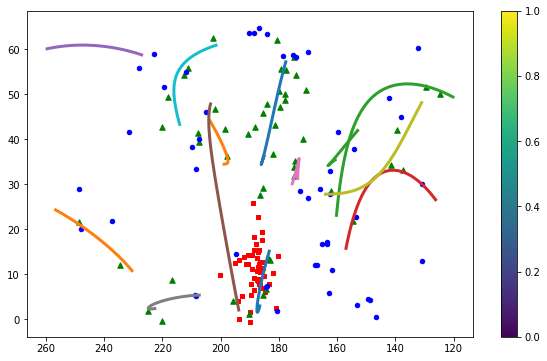

In [185]:
plt.figure(figsize=(10,6))
fflag = [virgo_members_subset,filament_members_subset,field_members_subset]
labels = ['Virgo Cluster','Filament','Field']
ssymbols = ['s','^','o']
ssize = [20,30,20]
colors = ['r','g','b']
for i,f in enumerate(fflag):
    plt.scatter(v.main['RA'][f],v.main['DEC'][f],s=ssize[i],c=colors[i],marker=ssymbols[i],label=labels[i])
plt.colorbar()
virgoCommon.plot_spines()
plt.gca().invert_xaxis()
#plt.legend()

# Research Questions 2 - are all spirals blue?

# NEED TO FIX LEGACY FILE - NOT RIGHT YET!!!

* seems ok now.  

## Need to create a separate file for this research question

* this is the full sample of galaxies that have 
  * legacy phot
  * galaxy zoo
  * not worrying about ALFALFA for now
* columns to include
  * name, RA, DEC
  * vr or distance
  * local density
  * g-r color
  * prob spiral
  * prob elliptical
  * prob interaction
  * prob bar
  * stellar mass
  * star formation rate
  * field
  * filament
  * cluster

In [252]:
len(gzoo)

6797

In [257]:
z0mgs_flag = (v.z0mgs['logmass'] > 8 ) & (v.z0mgs['logmass'] < 14 )   & v.main['Z0MGSflag']
a100_flag = (v.main['DEC'] < 32)
size_flag =  v.main['radius_flag'] & (v.main['radius'] < 150) & (v.main['radius'] > 40)
weird_flag = np.abs(v.env['SGX'] < 40.) & (v.env['n5th_2D'] > -999) 

gr = v.dr9['Mg']-v.dr9['Mr']
gr_flag = (gr > 0) & (gr < 1.2) & (~np.isnan(gr))

legacy_flag = (v.main['RA'] > 122)& (v.main['RA'] < 250) & gr_flag
flag = z0mgs_flag & a100_flag & size_flag & weird_flag & legacy_flag & gzoo_flag
flag_all = z0mgs_flag & size_flag & legacy_flag & gzoo_flag & weird_flag
print('flag with a100 ',sum(flag))
print('flag and not in virgo ',sum(novirgo_flag))

print('flag_all',sum(flag_all))
novirgo_flag = flag &(v.env['flag_clus'] < .5)
print('flag_all and not in virgo ',sum(flag_all & (v.env['flag_clus'] < .5)))



/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in subtract
  


flag with a100  316
flag and not in virgo  204
flag_all 522
flag_all and not in virgo  410


### Define Galaxy Zoo Flags

In [277]:
gzoo.colnames

AttributeError: 'list' object has no attribute 'colnames'

In [280]:
elliptical_flag =  (gzoo['t01_smooth_or_features_a01_smooth_debiased'] > 0.8)
disk_flag =  (gzoo['t01_smooth_or_features_a02_features_or_disk_debiased'] > 0.8)
spiral_flag =  (gzoo['t04_spiral_a08_spiral_debiased'] > 0.8)
bar_flag = (gzoo['t03_bar_a06_bar_debiased'] > 0.8)
ring_flag = (gzoo['t08_odd_feature_a19_ring_debiased'] > 0.8)
disturbed_flag = (gzoo['t08_odd_feature_a21_disturbed_debiased'] > 0.8)
merger_flag = (gzoo['t08_odd_feature_a24_merger_debiased'] > 0.8)

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:984: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


In [281]:
interaction_flag = ring_flag | disturbed_flag | merger_flag

In [255]:
len(elliptical_flag)

6797

### Write out file

In [282]:
vfcols = [v.main['VFID'],v.main['RA'],v.main['DEC'],v.env['Vcosmic']/70,v.main['NEDname']]
vfnames = ['name','RA','DEC','d_Mpc','NEDname']

z0mgs = [v.z0mgs['logmass'],v.z0mgs['logsfr']]
z0names = ['logMass','logSFR']

gzoo_cols = [elliptical_flag,disk_flag,spiral_flag,bar_flag,interaction_flag]
gzoo_names = ['elliptical','disk','spiral','bar','interaction']

env = [field_flag,filament_flag,cluster_flag,np.log10(v.env['n5th_2D'])]
env_names = ['field','filament','cluster','local_dens']

legacy = [v.dr9['Mg'],v.dr9['Mr'],v.dr9['Mg']-v.dr9['Mr'],legacy_urls]
legacy_names = ['Mg','Mr','g-r','legacy_url']

all_cols = vfcols + z0mgs + gzoo_cols + env + legacy 
all_names = vfnames + z0names + gzoo_names + env_names + legacy_names 

newtab = Table(all_cols,names=all_names)
newtab[flag_all].write(outdir+'astr101-all.fits',overwrite=True)

ctab = newtab[flag_all]


/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in subtract
  del sys.path[0]


# red spirals

In [260]:
sum(elliptical_flag)

686

In [283]:
s_flag = spiral_flag[flag_all]

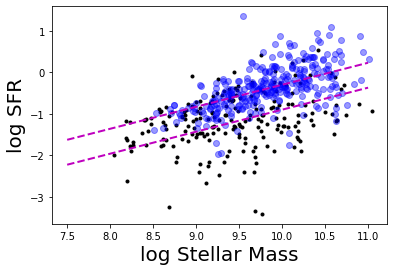

In [268]:
plt.figure()
plt.plot(ctab['logMass'][~s_flag],ctab['logSFR'][~s_flag],'k.')
plt.plot(ctab['logMass'][s_flag],ctab['logSFR'][s_flag],'bo',alpha=.4)
plt.xlabel('log Stellar Mass',fontsize=20)
plt.ylabel('log SFR',fontsize=20)
xline=np.linspace(7.5,11,20)
yline = .53*xline-5.6
plt.plot(xline,yline,'m--',lw=2)
plt.plot(xline,yline-.6,'m--',lw=2)

In [103]:
lowSFR_spiral_flag = s_flag & (ctab['logsfr'] < (0.53*ctab['logmass']-5.6-.6))

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:984: RuntimeWarning: invalid value encountered in less
  result = getattr(super(), op)(other)


In [104]:
sum(lowSFR_spiral_flag)

27

(-0.5, 1.5)

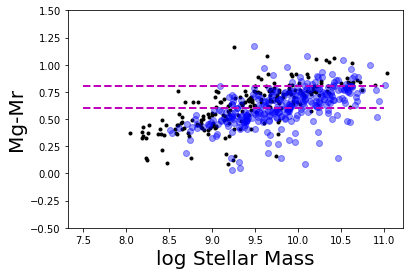

In [269]:
plt.figure()
y = ctab['Mg']-ctab['Mr']
plt.plot(ctab['logMass'][~s_flag],y[~s_flag],'k.')
plt.plot(ctab['logMass'][s_flag],y[s_flag],'bo',alpha=.4)
plt.xlabel('log Stellar Mass',fontsize=20)
plt.ylabel('Mg-Mr',fontsize=20)
xline=np.linspace(7.5,11,20)
yline = 0*xline+.6
plt.plot(xline,yline,'m--',lw=2)
plt.plot(xline,yline+.2,'m--',lw=2)
plt.ylim(-.5,1.5)

In [286]:
red_spiral_flag = (y > .7) & s_flag
print(ctab['NEDname'][red_spiral_flag])
print(sum(red_spiral_flag))

 NEDname 
---------
 NGC 4332
 NGC 4238
 NGC 5218
 NGC 3835
 NGC 5376
 NGC 5678
 NGC 2870
 NGC 5443
UGC 04906
 NGC 5676
      ...
 NGC 4795
 NGC 4235
 NGC 4343
 NGC 3976
 NGC 4260
 NGC 4580
 NGC 5560
  IC 1067
 NGC 4045
 NGC 5806
 NGC 5740
Length = 60 rows
60


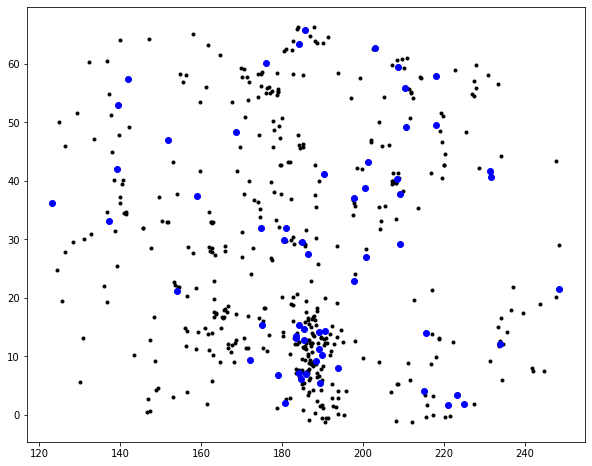

In [287]:
# plot positions of red spirals
plt.figure(figsize=(10,8))
plt.plot(ctab['RA'],ctab['DEC'],'k.')
plt.plot(ctab['RA'][red_spiral_flag],ctab['DEC'][red_spiral_flag],'bo')

In [275]:
sum(spiral_flag[flag_all])

307